## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

Der Befehl "head" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [2]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [5]:
# Write your code here
happiness_data = pd.read_csv(HAPPINESS_DATASET, header=0)


countries_data = pd.read_csv(COUNTRIES_DATASET, header=0)


,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


In [6]:
happiness_data.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [7]:
countries_data.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify to have all the rows in the final dataframe

In [15]:
happiness_copy = happiness_data.copy(deep= True)
happiness_copy["country"] = happiness_copy["country"].str.lower()


In [27]:
happiness_copy = happiness_copy.rename(columns={happiness_copy.columns[0]: countries_data.columns[0]}) # from column A-> Col_1, from row ONE -> Row_1

In [28]:
# Write your code here
country_features = pd.merge(happiness_copy, countries_data, how='outer')
country_features.head()

,country_name,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0"
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5"
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,"70,0"
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,"97,1"
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,"98,6"


## Task 3: Where do people are happier?

Print the top 10 countries based on their happiness score (high is better).

In [44]:
# Write your code here
happiest_index = country_features['happiness_score'].nlargest(10).index
happiest_index

Int64Index([38, 31, 115, 50, 92, 87, 114, 88, 6, 72], dtype='int64')

In [46]:
country_features.loc[happiest_index, 'country_name']

38         finland
31         denmark
115    switzerland
50         iceland
92          norway
87     netherlands
114         sweden
88     new zealand
6          austria
72      luxembourg
Name: country_name, dtype: object

We are interested to know in what world region the people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [51]:
country_features['world_region']

0                              South Asia
1              Central and Eastern Europe
2            Middle East and North Africa
3             Latin America and Caribbean
4      Commonwealth of Independent States
                      ...                
130           Latin America and Caribbean
131                        Southeast Asia
132          Middle East and North Africa
133                    Sub-Saharan Africa
134                    Sub-Saharan Africa
Name: world_region, Length: 135, dtype: object

In [65]:
# Write your code here
country_group = country_features.groupby(country_features.world_region)
numberofcountry = country_group.count()['country_name']
avghappiness = country_group.mean()['happiness_score']
happiness_region = pd.concat([numberofcountry, avghappiness], axis=1) # keep index


In [67]:
happiness_region

,country_name,happiness_score
world_region,,
Central and Eastern Europe,14,5.891393
Commonwealth of Independent States,12,5.358342
East Asia,3,5.483633
Latin America and Caribbean,20,5.971280
Middle East and North Africa,16,5.269306
North America and ANZ,4,7.173525
South Asia,6,4.355083
Southeast Asia,8,5.517788
Sub-Saharan Africa,32,4.393856


The first region has only a few countries! What are them and what is their score?

In [76]:
# Write your code here
inedex_row = happiness_region['happiness_score'].nlargest(1).index
happiness_region.loc[inedex_row]

,country_name,happiness_score
world_region,,
North America and ANZ,4,7.173525


## Task 4: How literate is the world?

Print the name of countries with a level of literacy of 100%. 

For each country, print the name and the world region with the format: *{region name} - {country name} ({happiness score})*

In [95]:
country_features['literacy'] = country_features['literacy'].str.replace(',', '.').astype(float)

In [114]:
filtered_countries=country_features[country_features['literacy']>=100]

In [115]:
filtered_countries.head()

,country_name,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
5,australia,7.2228,0.944855,73.604538,0.915432,0.190460,0.415169,North America and ANZ,7686850,20264082,100.0
31,denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,43094,5450661,100.0
38,finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,338145,5231372,100.0
72,luxembourg,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe,2586,474413,100.0
92,norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,323802,4610820,100.0


In [116]:
filtered_countries[['world_region', 'country_name',]]

,world_region,country_name
5,North America and ANZ,australia
31,Western Europe,denmark
38,Western Europe,finland
72,Western Europe,luxembourg
92,Western Europe,norway


What is the global average?

In [117]:
# Write your code here
country_features['literacy'].mean()

81.85112781954888

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [143]:
# Write your code here
literacy_50 = country_features['literacy']<50
lit_below50 = country_features.loc[~(literacy_50==False)]
percentage = lit_below50.shape[0]/country_features.shape[0]
format_float = "{:.2f}".format(percentage)
print(format_float)

0.12


Print the raw number and the percentage of world population that is illiterate.

In [147]:
country_features.loc[0,'literacy']

,country_name,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6


309813157.5

In [160]:
# Write your code here
population_literacy = country_features['literacy']/100*country_features['population']
literacy_sum = population_literacy.sum()
iliteracy_sum = country_features['population'].sum() - literacy_sum
ileteracy_percentage = iliteracy_sum / country_features['population'].sum()
format_float = "{:.2f}".format(ileteracy_percentage)
print(format_float)

0.20


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [171]:
# Write your code here
population_density = country_features['population']/country_features['area']
country_features_plus = country_features.copy(deep=True)
#pd.concat([country_features, population_density], axis=1)

In [175]:
country_features_plus['population_density']= population_density
country_features_plus.head()

,country_name,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0,47.964474
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5,124.587971
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0,13.826065
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1,14.428413
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6,99.878255


What is the happiness score of the 3 countries with lowest population density?

In [191]:
# Write your code here
index_population_density = country_features_plus['population_density'].nsmallest(3).index
country_features_plus.loc[index_population_density]['country_name']

83     mongolia
5     australia
14     botswana
Name: country_name, dtype: object

## Task 6: Healty and happy?

Plot in scatter plot the happiness score (x) and healty life expectancy (y).

(<AxesSubplot:xlabel='happiness_score', ylabel='healthy_life_expectancy'>,)

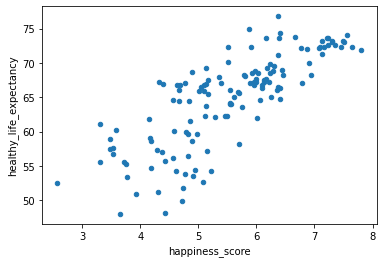

In [195]:
# Write your code here
import matplotlib.pyplot as plt
country_features.plot(x ='happiness_score', y='healthy_life_expectancy', kind='scatter'),

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.